# 7 Recurrent neural networks
In this exercise we will try a simple experiment with a recurrent neural network. One of the well-known recurrent neural network models is the so called Long short-term memory (LSTM) network. More information on LSTM can be found in the text [Understanding LSTM Networks](http://colah.github.io/posts/2015-08-Understanding-LSTMs/).

## 7.1 The MNIST dataset revisited (1)
In one of the previous exercises the MNIST dataset was used to demonstrate the use of multilayer perceptron. Here we are going to apply a recurrent neural network to the problem of digits classification. To keep it simple, we will use a simple LSTM network that will be fed with one row of the image at a time. With each new row, it will update its states and give its prediction. What we are interested in is its prediction after the last row i.e. after it has the full information.

In [1]:
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()
from tensorflow.compat.v1.nn import static_rnn
from tensorflow.compat.v1.nn.rnn_cell import BasicLSTMCell

import input_data
mnist=input_data.read_data_sets("mnist/", one_hot=True)

learning_rate=0.005
training_epochs_count=15
batch_size=150
batches_count=int(mnist.train.num_examples/batch_size)
display_step=1

#we will feed a row at a time to the LSTM and there are 28 rows per image
timesteps=28
#each row has 28 columns whose values are simultaneously passed to LSTM
n_input=28 # MNIST data input (img shape: 28*28)
#the number of hidden states in the LSTM
n_hidden=128
n_classes=10

x=tf.placeholder("float", [None, timesteps, n_input])
y=tf.placeholder("float", [None, n_classes])

#separate the rows separate rows
unstacked=tf.unstack(x, timesteps, 1)

#prepare the LSTM
lstm_cell=BasicLSTMCell(n_hidden)
#feed the rows iteratively to LSTM
outputs, states=static_rnn(lstm_cell, unstacked, dtype=tf.float32)
#take the last output (index -1) i.e. the output after the last row and use it for classification
logits=tf.layers.dense(outputs[-1], n_classes)
y_predicted=tf.nn.softmax(logits)

cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer=tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

correct_y_predicted=tf.equal(tf.argmax(y_predicted, 1), tf.argmax(y, 1))
accuracy=tf.reduce_mean(tf.cast(correct_y_predicted, tf.float32))

acc28 = []

#with such a block we don't need to close the session later - it will be closed automatically
with tf.Session() as session:
    session.run(tf.global_variables_initializer())
    for epoch in range(training_epochs_count):
        for i in range(batches_count):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            session.run(optimizer, feed_dict={x:batch_x.reshape((-1, timesteps, n_input)), y:batch_y})
        if ((epoch+1)%display_step==0):
            acc = session.run(accuracy, feed_dict={x: mnist.test.images.reshape((-1, timesteps, n_input)), y: mnist.test.labels})
            acc28.append(acc)
            print("Epoch #"+str(epoch+1)+" "+str(acc))


Extracting mnist/train-images-idx3-ubyte.gz
Extracting mnist/train-labels-idx1-ubyte.gz
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use `keras.layers.RNN(cell, unroll=True)`, which is equivalent to this API
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


C:\Users\Dominik\anaconda3\envs\nnets\lib\site-packages\tensorflow\python\keras\layers\legacy_rnn\rnn_cell_impl.py:711: UserWarning: `tf.nn.rnn_cell.BasicLSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  warnings.warn("`tf.nn.rnn_cell.BasicLSTMCell` is deprecated and will be "
C:\Users\Dominik\anaconda3\envs\nnets\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1702: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



C:\Users\Dominik\AppData\Local\Temp\ipykernel_17356\705226105.py:34: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  logits=tf.layers.dense(outputs[-1], n_classes)


Epoch #1 0.9667
Epoch #2 0.9754
Epoch #3 0.9703
Epoch #4 0.9814
Epoch #5 0.9866
Epoch #6 0.9845
Epoch #7 0.9858
Epoch #8 0.9852
Epoch #9 0.9854
Epoch #10 0.9856
Epoch #11 0.9871
Epoch #12 0.9859
Epoch #13 0.9885
Epoch #14 0.9886
Epoch #15 0.9861


In [2]:
print(acc28)

[0.9667, 0.9754, 0.9703, 0.9814, 0.9866, 0.9845, 0.9858, 0.9852, 0.9854, 0.9856, 0.9871, 0.9859, 0.9885, 0.9886, 0.9861]


In [1]:
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()
from tensorflow.compat.v1.nn import static_rnn
from tensorflow.compat.v1.nn.rnn_cell import BasicLSTMCell

import input_data
mnist=input_data.read_data_sets("mnist/", one_hot=True)

learning_rate=0.005
training_epochs_count=15
batch_size=150
batches_count=int(mnist.train.num_examples/batch_size)
display_step=1


timesteps=14



#each row has 28 columns whose values are simultaneously passed to LSTM
n_input=28 # MNIST data input (img shape: 28*28)
#the number of hidden states in the LSTM
n_hidden=128
n_classes=10

x=tf.placeholder("float", [None, timesteps, n_input])
y=tf.placeholder("float", [None, n_classes])

#separate the rows separate rows
unstacked=tf.unstack(x, timesteps, 1)

#prepare the LSTM
lstm_cell=BasicLSTMCell(n_hidden)
#feed the rows iteratively to LSTM
outputs, states=static_rnn(lstm_cell, unstacked, dtype=tf.float32)
#take the last output (index -1) i.e. the output after the last row and use it for classification
logits=tf.layers.dense(outputs[-1], n_classes)
y_predicted=tf.nn.softmax(logits)

cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer=tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

correct_y_predicted=tf.equal(tf.argmax(y_predicted, 1), tf.argmax(y, 1))
accuracy=tf.reduce_mean(tf.cast(correct_y_predicted, tf.float32))

acc1 = []

#with such a block we don't need to close the session later - it will be closed automatically
with tf.Session() as session:
    session.run(tf.global_variables_initializer())
    for epoch in range(training_epochs_count):
        for i in range(batches_count):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            batch_x = batch_x.reshape(batch_size, n_input, n_input)
            session.run(optimizer, feed_dict={x:batch_x[:,:timesteps,:], y:batch_y})
        if ((epoch+1)%display_step==0):
            acc = session.run(accuracy, feed_dict={x: mnist.test.images.reshape(-1, n_input, n_input)[:,:timesteps,:], y: mnist.test.labels})
            acc1.append(acc)
            print("Epoch #"+str(epoch+1)+" "+str(acc))

print(acc1)

Extracting mnist/train-images-idx3-ubyte.gz
Extracting mnist/train-labels-idx1-ubyte.gz
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use `keras.layers.RNN(cell, unroll=True)`, which is equivalent to this API
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


C:\Users\Dominik\anaconda3\envs\nnets\lib\site-packages\tensorflow\python\keras\layers\legacy_rnn\rnn_cell_impl.py:711: UserWarning: `tf.nn.rnn_cell.BasicLSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  warnings.warn("`tf.nn.rnn_cell.BasicLSTMCell` is deprecated and will be "
C:\Users\Dominik\anaconda3\envs\nnets\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1702: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



C:\Users\Dominik\AppData\Local\Temp\ipykernel_10652\3609110698.py:37: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  logits=tf.layers.dense(outputs[-1], n_classes)


Epoch #1 0.913
Epoch #2 0.9326
Epoch #3 0.9328
Epoch #4 0.9366
Epoch #5 0.9368
Epoch #6 0.9435
Epoch #7 0.9435
Epoch #8 0.9419
Epoch #9 0.9397
Epoch #10 0.9371
Epoch #11 0.9459
Epoch #12 0.9421
Epoch #13 0.9405
Epoch #14 0.9431
Epoch #15 0.9422
[0.913, 0.9326, 0.9328, 0.9366, 0.9368, 0.9435, 0.9435, 0.9419, 0.9397, 0.9371, 0.9459, 0.9421, 0.9405, 0.9431, 0.9422]


In [1]:
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()
from tensorflow.compat.v1.nn import static_rnn
from tensorflow.compat.v1.nn.rnn_cell import BasicLSTMCell

import input_data
mnist=input_data.read_data_sets("mnist/", one_hot=True)

learning_rate=0.005
training_epochs_count=15
batch_size=150
batches_count=int(mnist.train.num_examples/batch_size)
display_step=1


timesteps=7



#each row has 28 columns whose values are simultaneously passed to LSTM
n_input=28 # MNIST data input (img shape: 28*28)
#the number of hidden states in the LSTM
n_hidden=128
n_classes=10

x=tf.placeholder("float", [None, timesteps, n_input])
y=tf.placeholder("float", [None, n_classes])

#separate the rows separate rows
unstacked=tf.unstack(x, timesteps, 1)

#prepare the LSTM
lstm_cell=BasicLSTMCell(n_hidden)
#feed the rows iteratively to LSTM
outputs, states=static_rnn(lstm_cell, unstacked, dtype=tf.float32)
#take the last output (index -1) i.e. the output after the last row and use it for classification
logits=tf.layers.dense(outputs[-1], n_classes)
y_predicted=tf.nn.softmax(logits)

cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer=tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

correct_y_predicted=tf.equal(tf.argmax(y_predicted, 1), tf.argmax(y, 1))
accuracy=tf.reduce_mean(tf.cast(correct_y_predicted, tf.float32))

acc1 = []

#with such a block we don't need to close the session later - it will be closed automatically
with tf.Session() as session:
    session.run(tf.global_variables_initializer())
    for epoch in range(training_epochs_count):
        for i in range(batches_count):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            batch_x = batch_x.reshape(batch_size, n_input, n_input)
            session.run(optimizer, feed_dict={x:batch_x[:,:timesteps,:], y:batch_y})
        if ((epoch+1)%display_step==0):
            acc = session.run(accuracy, feed_dict={x: mnist.test.images.reshape(-1, n_input, n_input)[:,:timesteps,:], y: mnist.test.labels})
            acc1.append(acc)
            print("Epoch #"+str(epoch+1)+" "+str(acc))

print(acc1)

Extracting mnist/train-images-idx3-ubyte.gz
Extracting mnist/train-labels-idx1-ubyte.gz
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use `keras.layers.RNN(cell, unroll=True)`, which is equivalent to this API
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


C:\Users\Dominik\anaconda3\envs\nnets\lib\site-packages\tensorflow\python\keras\layers\legacy_rnn\rnn_cell_impl.py:711: UserWarning: `tf.nn.rnn_cell.BasicLSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  warnings.warn("`tf.nn.rnn_cell.BasicLSTMCell` is deprecated and will be "
C:\Users\Dominik\anaconda3\envs\nnets\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1702: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '
C:\Users\Dominik\AppData\Local\Temp\ipykernel_8372\3320092968.py:37: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  logits=tf.layers.dense(outputs[-1], n_classes)


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Epoch #1 0.5923
Epoch #2 0.6105
Epoch #3 0.6168
Epoch #4 0.6283
Epoch #5 0.6344
Epoch #6 0.6305
Epoch #7 0.6391
Epoch #8 0.6389
Epoch #9 0.639
Epoch #10 0.64
Epoch #11 0.6386
Epoch #12 0.6405
Epoch #13 0.6446
Epoch #14 0.6402
Epoch #15 0.6409
[0.5923, 0.6105, 0.6168, 0.6283, 0.6344, 0.6305, 0.6391, 0.6389, 0.639, 0.64, 0.6386, 0.6405, 0.6446, 0.6402, 0.6409]


In [1]:
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()
from tensorflow.compat.v1.nn import static_rnn
from tensorflow.compat.v1.nn.rnn_cell import BasicLSTMCell

import input_data
mnist=input_data.read_data_sets("mnist/", one_hot=True)

learning_rate=0.005
training_epochs_count=15
batch_size=150
batches_count=int(mnist.train.num_examples/batch_size)
display_step=1


timesteps=2



#each row has 28 columns whose values are simultaneously passed to LSTM
n_input=28 # MNIST data input (img shape: 28*28)
#the number of hidden states in the LSTM
n_hidden=128
n_classes=10

x=tf.placeholder("float", [None, timesteps, n_input])
y=tf.placeholder("float", [None, n_classes])

#separate the rows separate rows
unstacked=tf.unstack(x, timesteps, 1)

#prepare the LSTM
lstm_cell=BasicLSTMCell(n_hidden)
#feed the rows iteratively to LSTM
outputs, states=static_rnn(lstm_cell, unstacked, dtype=tf.float32)
#take the last output (index -1) i.e. the output after the last row and use it for classification
logits=tf.layers.dense(outputs[-1], n_classes)
y_predicted=tf.nn.softmax(logits)

cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer=tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

correct_y_predicted=tf.equal(tf.argmax(y_predicted, 1), tf.argmax(y, 1))
accuracy=tf.reduce_mean(tf.cast(correct_y_predicted, tf.float32))

acc1 = []

#with such a block we don't need to close the session later - it will be closed automatically
with tf.Session() as session:
    session.run(tf.global_variables_initializer())
    for epoch in range(training_epochs_count):
        for i in range(batches_count):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            batch_x = batch_x.reshape(batch_size, n_input, n_input)
            session.run(optimizer, feed_dict={x:batch_x[:,:timesteps,:], y:batch_y})
        if ((epoch+1)%display_step==0):
            acc = session.run(accuracy, feed_dict={x: mnist.test.images.reshape(-1, n_input, n_input)[:,:timesteps,:], y: mnist.test.labels})
            acc1.append(acc)
            print("Epoch #"+str(epoch+1)+" "+str(acc))

print(acc1)

Extracting mnist/train-images-idx3-ubyte.gz
Extracting mnist/train-labels-idx1-ubyte.gz
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use `keras.layers.RNN(cell, unroll=True)`, which is equivalent to this API
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



C:\Users\Dominik\anaconda3\envs\nnets\lib\site-packages\tensorflow\python\keras\layers\legacy_rnn\rnn_cell_impl.py:711: UserWarning: `tf.nn.rnn_cell.BasicLSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  warnings.warn("`tf.nn.rnn_cell.BasicLSTMCell` is deprecated and will be "
C:\Users\Dominik\anaconda3\envs\nnets\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1702: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '
C:\Users\Dominik\AppData\Local\Temp\ipykernel_5160\628077283.py:37: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  logits=tf.layers.dense(outputs[-1], n_classes)


Epoch #1 0.1178
Epoch #2 0.1178
Epoch #3 0.1178
Epoch #4 0.1178
Epoch #5 0.1178
Epoch #6 0.1178
Epoch #7 0.1178
Epoch #8 0.1178
Epoch #9 0.1178
Epoch #10 0.1178
Epoch #11 0.1178
Epoch #12 0.1178
Epoch #13 0.1178
Epoch #14 0.1178
Epoch #15 0.1178
[0.1178, 0.1178, 0.1178, 0.1178, 0.1178, 0.1178, 0.1178, 0.1178, 0.1178, 0.1178, 0.1178, 0.1178, 0.1178, 0.1178, 0.1178]


**Tasks**

1. Study and run the code below.
2. Readjust the parameters in order to make the model obtain acuracy above 0.99 on the test set.
3. Draw a plot that shows the relation between the number of rows given to the network and its final accuracy on the test set.
4. What happens if we use gradient descent instead of Adam?

2 -> 15 epochs, 150 batch size and 0.005 lr.



NOTE: when you want to restart the code, first shutdown the kernel e.g. by choosing Kernel in the menu above and then Restart & Clear Output.

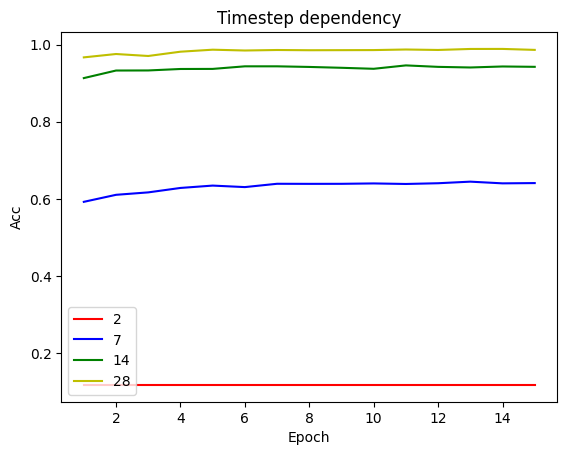

In [2]:
acc2 = [0.1178, 0.1178, 0.1178, 0.1178, 0.1178, 0.1178, 0.1178, 0.1178, 0.1178, 0.1178, 0.1178, 0.1178, 0.1178, 0.1178, 0.1178]
acc7 = [0.5923, 0.6105, 0.6168, 0.6283, 0.6344, 0.6305, 0.6391, 0.6389, 0.639, 0.64, 0.6386, 0.6405, 0.6446, 0.6402, 0.6409]
acc14 = [0.913, 0.9326, 0.9328, 0.9366, 0.9368, 0.9435, 0.9435, 0.9419, 0.9397, 0.9371, 0.9459, 0.9421, 0.9405, 0.9431, 0.9422]
acc28 = [0.9667, 0.9754, 0.9703, 0.9814, 0.9866, 0.9845, 0.9858, 0.9852, 0.9854, 0.9856, 0.9871, 0.9859, 0.9885, 0.9886, 0.9861]


import matplotlib.pyplot as plt



plt.plot(range(1,16), acc2, 'r', label='2') 
plt.plot(range(1,16), acc7, 'b', label='7') 
plt.plot(range(1,16), acc14, 'g', label='14')
plt.plot(range(1,16), acc28, 'y', label='28')
plt.xlabel("Epoch")
plt.ylabel("Acc")
plt.title("Timestep dependency")
plt.legend()
plt.show()

In [1]:
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()
from tensorflow.compat.v1.nn import static_rnn
from tensorflow.compat.v1.nn.rnn_cell import BasicLSTMCell

import input_data
mnist=input_data.read_data_sets("mnist/", one_hot=True)

learning_rate=0.005
training_epochs_count=15
batch_size=150
batches_count=int(mnist.train.num_examples/batch_size)
display_step=1

#we will feed a row at a time to the LSTM and there are 28 rows per image
timesteps=28
#each row has 28 columns whose values are simultaneously passed to LSTM
n_input=28 # MNIST data input (img shape: 28*28)
#the number of hidden states in the LSTM
n_hidden=128
n_classes=10

x=tf.placeholder("float", [None, timesteps, n_input])
y=tf.placeholder("float", [None, n_classes])

#separate the rows separate rows
unstacked=tf.unstack(x, timesteps, 1)

#prepare the LSTM
lstm_cell=BasicLSTMCell(n_hidden)
#feed the rows iteratively to LSTM
outputs, states=static_rnn(lstm_cell, unstacked, dtype=tf.float32)
#take the last output (index -1) i.e. the output after the last row and use it for classification
logits=tf.layers.dense(outputs[-1], n_classes)
y_predicted=tf.nn.softmax(logits)

cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer=tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

correct_y_predicted=tf.equal(tf.argmax(y_predicted, 1), tf.argmax(y, 1))
accuracy=tf.reduce_mean(tf.cast(correct_y_predicted, tf.float32))

acc28 = []

#with such a block we don't need to close the session later - it will be closed automatically
with tf.Session() as session:
    session.run(tf.global_variables_initializer())
    for epoch in range(training_epochs_count):
        for i in range(batches_count):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            session.run(optimizer, feed_dict={x:batch_x.reshape((-1, timesteps, n_input)), y:batch_y})
        if ((epoch+1)%display_step==0):
            acc = session.run(accuracy, feed_dict={x: mnist.test.images.reshape((-1, timesteps, n_input)), y: mnist.test.labels})
            acc28.append(acc)
            print("Epoch #"+str(epoch+1)+" "+str(acc))


Extracting mnist/train-images-idx3-ubyte.gz
Extracting mnist/train-labels-idx1-ubyte.gz
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use `keras.layers.RNN(cell, unroll=True)`, which is equivalent to this API
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


C:\Users\Dominik\anaconda3\envs\nnets\lib\site-packages\tensorflow\python\keras\layers\legacy_rnn\rnn_cell_impl.py:711: UserWarning: `tf.nn.rnn_cell.BasicLSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  warnings.warn("`tf.nn.rnn_cell.BasicLSTMCell` is deprecated and will be "
C:\Users\Dominik\anaconda3\envs\nnets\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1702: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



C:\Users\Dominik\AppData\Local\Temp\ipykernel_17440\919231677.py:34: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  logits=tf.layers.dense(outputs[-1], n_classes)


Epoch #1 0.3097
Epoch #2 0.3483
Epoch #3 0.3296
Epoch #4 0.3964
Epoch #5 0.4657
Epoch #6 0.53
Epoch #7 0.5892
Epoch #8 0.6354
Epoch #9 0.6743
Epoch #10 0.707
Epoch #11 0.7355
Epoch #12 0.7598
Epoch #13 0.7839
Epoch #14 0.7971
Epoch #15 0.8361


In [2]:
print(acc28)

[0.3097, 0.3483, 0.3296, 0.3964, 0.4657, 0.53, 0.5892, 0.6354, 0.6743, 0.707, 0.7355, 0.7598, 0.7839, 0.7971, 0.8361]


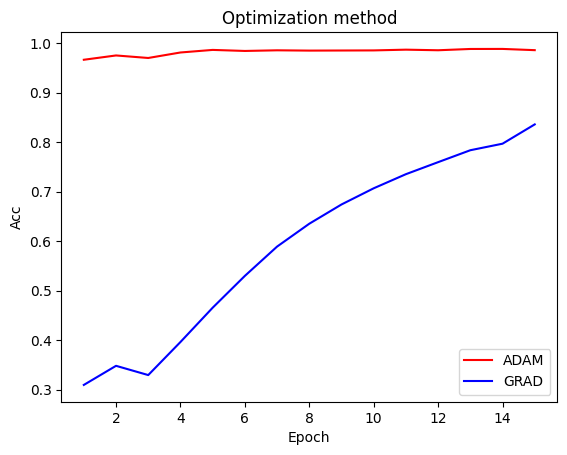

In [6]:
acc28Adam = [0.9667, 0.9754, 0.9703, 0.9814, 0.9866, 0.9845, 0.9858, 0.9852, 0.9854, 0.9856, 0.9871, 0.9859, 0.9885, 0.9886, 0.9861]
acc28Grad = [0.3097, 0.3483, 0.3296, 0.3964, 0.4657, 0.53, 0.5892, 0.6354, 0.6743, 0.707, 0.7355, 0.7598, 0.7839, 0.7971, 0.8361]


import matplotlib.pyplot as plt

plt.plot(range(1,16), acc28Adam, 'r', label='ADAM') 
plt.plot(range(1,16), acc28Grad, 'b', label='GRAD')
plt.xlabel("Epoch")
plt.ylabel("Acc")
plt.title("Optimization method")
plt.legend()
plt.show()